# Python Pandas
## Merge, Join and Concatenate

* 1 - Concatenating objects
  * 1.1 - The `concat()` function
    * 1.1.1 - Concatenate along the vertical axis
    * 1.1.2 - Concatenate in a horizontal axix
  * 1.2 - Concatenate using `apend()`
  * 1.3 - Merge function
    * 1.3.1 - Apply merge
    * 1.3.2 - See Examples of `inner`, `outer`, `right` and `left` join
    
[Official Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [1]:
import pandas as pd

In [2]:
AAPLa = pd.read_csv('merge/AAPLa.csv', index_col = ['Date'])
AAPLb = pd.read_csv('merge/AAPLb.csv', index_col = ['Date'])

In [3]:
AAPLa

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2/1/2020,76.074997,81.805000,64.092499,68.339996,67.754868,3019851200
3/1/2020,70.570000,76.000000,53.152500,63.572498,63.177769,6280072400
4/1/2020,61.625000,73.632500,59.224998,73.449997,72.993935,3266123200
5/1/2020,71.562500,81.059998,71.462502,79.485001,78.991470,2806405200
6/1/2020,79.437500,93.095001,79.302498,91.199997,90.879066,1897053000
7/1/2020,91.279999,106.415001,89.144997,106.260002,105.886086,2851911900
8/1/2020,108.199997,131.000000,107.892502,129.039993,128.585907,4070623100
9/1/2020,132.759995,137.979996,103.099998,115.809998,115.610542,3885767100
10/1/2020,117.639999,125.389999,107.720001,108.860001,108.672516,2895016800


In [4]:
AAPLb

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
11/1/2020,109.110001,121.989998,107.320000,119.050003,118.844963,2123077300
12/1/2020,121.010002,138.789993,120.010002,132.690002,132.690002,2322830600


# 1 - Concatenating objects
## 1.1 - The `concat()` function

The `concat()` function does all the heavy lifting along an axis, whlie performing logical operations (union or intersection)

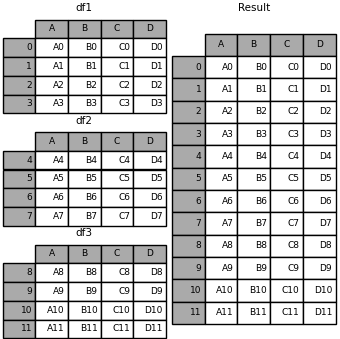

### 1.1.1 - Concatenate along the vertical axis

By default the concatenation is on the vertical axis (i.e. axis = 0).

For the exemple, dataset **AAPLb** will be appended to **AAPLa**

In [5]:
pd.concat([AAPLa, AAPLb])

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2/1/2020,76.074997,81.805000,64.092499,68.339996,67.754868,3019851200
3/1/2020,70.570000,76.000000,53.152500,63.572498,63.177769,6280072400
4/1/2020,61.625000,73.632500,59.224998,73.449997,72.993935,3266123200
5/1/2020,71.562500,81.059998,71.462502,79.485001,78.991470,2806405200
6/1/2020,79.437500,93.095001,79.302498,91.199997,90.879066,1897053000
7/1/2020,91.279999,106.415001,89.144997,106.260002,105.886086,2851911900
8/1/2020,108.199997,131.000000,107.892502,129.039993,128.585907,4070623100
9/1/2020,132.759995,137.979996,103.099998,115.809998,115.610542,3885767100
10/1/2020,117.639999,125.389999,107.720001,108.860001,108.672516,2895016800


### 1.1.2 - Concatenate in a horizontal axis

To use a horizontal one has to set `axis = 1`. By default `concat` function will match indexes

In [6]:
FUNDSa = pd.read_csv('merge/Fundsa.csv', index_col = ['Fund'])
FUNDSb = pd.read_csv('merge/Fundsb.csv', index_col = ['Fund'])

In [7]:
FUNDSa

,NPV,Market Value
Fund,,
Fund A,795.01,785.5
Fund B,947.20,962.4
Fund C,1441.76,1451.8
Fund D,2205.79,2199.2


In [9]:
FUNDSb

,NAV
Fund,
Fund B,784.67
Fund D,982.25
Fund E,1486.45
Fund H,2227.85


Append both datasets along horizontal axis. By default `concat` outputs an outer join (`join = outer`).
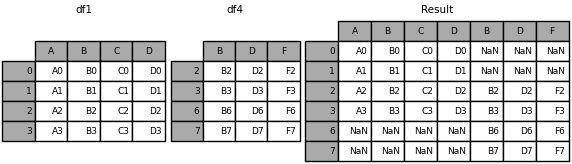

In [10]:
# pd.concat([FUNDSa, FUNDSc], axis=1)
pd.concat([FUNDSa, FUNDSb], axis=1, join = 'outer')

,NPV,Market Value,NAV
Fund A,795.01,785.5,NaN
Fund B,947.20,962.4,784.67
Fund C,1441.76,1451.8,NaN
Fund D,2205.79,2199.2,982.25
Fund E,NaN,NaN,1486.45
Fund H,NaN,NaN,2227.85


Below is the same thing with inner join

In [11]:
pd.concat([FUNDSa, FUNDSb], axis=1, join = 'inner')

,NPV,Market Value,NAV
Fund,,,
Fund B,947.20,962.4,784.67
Fund D,2205.79,2199.2,982.25


## 1.2 - Concatenate using `apend()`

In [12]:
AAPLa.append(AAPLb, sort = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2/1/2020,76.074997,81.805000,64.092499,68.339996,67.754868,3019851200
3/1/2020,70.570000,76.000000,53.152500,63.572498,63.177769,6280072400
4/1/2020,61.625000,73.632500,59.224998,73.449997,72.993935,3266123200
5/1/2020,71.562500,81.059998,71.462502,79.485001,78.991470,2806405200
6/1/2020,79.437500,93.095001,79.302498,91.199997,90.879066,1897053000
7/1/2020,91.279999,106.415001,89.144997,106.260002,105.886086,2851911900
8/1/2020,108.199997,131.000000,107.892502,129.039993,128.585907,4070623100
9/1/2020,132.759995,137.979996,103.099998,115.809998,115.610542,3885767100
10/1/2020,117.639999,125.389999,107.720001,108.860001,108.672516,2895016800


## 1.3 - Merge function

It is very similar to realtional databases like SQL.

For the case below there are prices for Microsoft stock and S&P500. This function is equivalent a `vlookup`

In [13]:
SP500 = pd.read_csv('merge/GSPC.csv')[['Date', 'Close']]
MSFT = pd.read_csv('merge/MSFT.csv')[['Date', 'Close']]

In [14]:
SP500.head()

,Date,Close
0,2015-12-23,2064.290039
1,2015-12-24,2060.989990
2,2015-12-28,2056.500000
3,2015-12-29,2078.360107
4,2015-12-30,2063.360107


In [15]:
MSFT.head()

,Date,Close
0,2015-12-23,55.820000
1,2015-12-24,55.669998
2,2015-12-28,55.950001
3,2015-12-29,56.549999
4,2015-12-30,56.310001


### 1.3.1 - Apply merge

On below example `merge` function is used to match close prices of **S&P500** with **Microsoft** prices for the same date. By default this uses an `outer` join.

In [16]:
pd.merge(SP500, MSFT, on = 'Date')

,Date,Close_x,Close_y
0,2015-12-23,2064.290039,55.820000
1,2015-12-24,2060.989990,55.669998
2,2015-12-28,2056.500000,55.950001
3,2015-12-29,2078.360107,56.549999
4,2015-12-30,2063.360107,56.310001
...,...,...,...
1254,2020-12-16,3701.169922,219.279999
1255,2020-12-17,3722.479980,219.419998
1256,2020-12-18,3709.409912,218.589996
1257,2020-12-21,3694.919922,222.589996


For the below case I want to match the same `Date` column and remove the ones observations where the same Date is not in either one of the dataframes or the other. 

I want to specify an `Inner` join such that it removes all lines where for each date there is a price for one ticker but not for the other.

In [17]:
pd.merge(SP500, MSFT, on = 'Date', how = 'inner', suffixes = ['_Price_SPX', '_Price_MSFT'])

,Date,Close_Price_SPX,Close_Price_MSFT
0,2015-12-23,2064.290039,55.820000
1,2015-12-24,2060.989990,55.669998
2,2015-12-28,2056.500000,55.950001
3,2015-12-29,2078.360107,56.549999
4,2015-12-30,2063.360107,56.310001
...,...,...,...
1254,2020-12-16,3701.169922,219.279999
1255,2020-12-17,3722.479980,219.419998
1256,2020-12-18,3709.409912,218.589996
1257,2020-12-21,3694.919922,222.589996


Look at the example with the funds dataframes

In [18]:
A = FUNDSa.reset_index()
B = FUNDSb.reset_index()

In [19]:
A

,Fund,NPV,Market Value
0,Fund A,795.01,785.5
1,Fund B,947.20,962.4
2,Fund C,1441.76,1451.8
3,Fund D,2205.79,2199.2


In [20]:
B

,Fund,NAV
0,Fund B,784.67
1,Fund D,982.25
2,Fund E,1486.45
3,Fund H,2227.85


### 1.3.2 - See examples of `inner`, `outer`, `right` and `left` join

In [21]:
pd.merge(A, B, on = 'Fund')

,Fund,NPV,Market Value,NAV
0,Fund B,947.20,962.4,784.67
1,Fund D,2205.79,2199.2,982.25


In [22]:
pd.merge(A, B, on = 'Fund', how = 'inner')

,Fund,NPV,Market Value,NAV
0,Fund B,947.20,962.4,784.67
1,Fund D,2205.79,2199.2,982.25


In [23]:
pd.merge(A, B, on = 'Fund', how = 'outer')

,Fund,NPV,Market Value,NAV
0,Fund A,795.01,785.5,NaN
1,Fund B,947.20,962.4,784.67
2,Fund C,1441.76,1451.8,NaN
3,Fund D,2205.79,2199.2,982.25
4,Fund E,NaN,NaN,1486.45
5,Fund H,NaN,NaN,2227.85


In [24]:
pd.merge(A, B, on = 'Fund', how = 'left')

,Fund,NPV,Market Value,NAV
0,Fund A,795.01,785.5,NaN
1,Fund B,947.20,962.4,784.67
2,Fund C,1441.76,1451.8,NaN
3,Fund D,2205.79,2199.2,982.25


In [25]:
pd.merge(A, B, on = 'Fund', how = 'right')

,Fund,NPV,Market Value,NAV
0,Fund B,947.20,962.4,784.67
1,Fund D,2205.79,2199.2,982.25
2,Fund E,NaN,NaN,1486.45
3,Fund H,NaN,NaN,2227.85
